UWAGA: Wczytaj do Colab plik **frozen_lake.py** (intrukcja w pliku **COLAB_instrukcja.pdf**)

# **FrozenLake 1**

# Wprowadzenie

Agent porusza się w świecie złożonym z **16 pól (stanów)**. Stany są ponumerowane od 0 do 15.

Niektóre pola siatki są dostępne do chodzenia (**F**-frozen), a inne są przeręblami (**H**-hole). 

Możliwe są 4 akcje: **0 - LEFT, 1 - DOWN, 2 - RIGHT, 3 - UP**

Agent jest nagradzany (**R=1**) za dotarcie do pola **G**. W pozostałych przypadkach **R=0.**

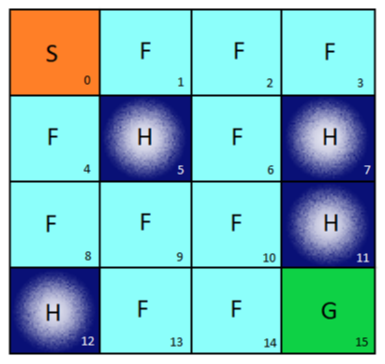

Załadowanie biblioteki (wcześniej konieczne załadowanie pliku **frozen_lake.py** do Colaba - instrukcja w pliku **PDF**).

In [0]:
from frozen_lake import FrozenLakeEnv

Wczytanie środowiska:

In [0]:
env = FrozenLakeEnv()

Sprawdzamy ilość możliwych stanów (16) i akcji (4)

In [0]:
print(env.nS)
print(env.nA)

16
4


# Dynamika

Dynamika opisana jest za pomoca: `env.P[s][a]`
            
gdzie: **s** to **stan** (0,1,2,...,15), **a** to **akcja** (0,1,2,3). 

Rozważmy przykład: w stanie 0 agent wykonuje akcję 1 (porusza się w dół):

In [0]:
env.P[0][1]

[(1.0, 4, 0.0, False)]

Powyższą czwórkę interperetujemy jako: **(prawdopodobieństwo, nowy stan, nagroda, czy koniec?)**.

Czyli w powyższym przykładzie: po wykonaniu w stanie 0 akcji 1 prawdopodobieństwo przejścia do stanu 4 wynosi 1, nagroda 0, agent nie wpadł do przerębli ani nie dotarł do pola G.


# Polecenie 1 (do uzupełnienia)

Sprawdź dynamikę dla dla następujących przypadków:

W **stanie 1** agent **przechodzi w dół**:

W **stanie 10** agent **przechodzi w lewo**:

W **stanie 14** agent **przechodzi w prawo**:

# Poruszanie i wizualizacja

W świecie FrozenLake możemy się poruszać wykonująć 4 akcje (omówione powyżej). Podgląd położenia uzyskujemy za pomocą `env.render()` (wcześniej resetujemy położenie agenta). 

In [0]:
env.reset()
env.render()


SFFF
FHFH
FFFH
HFFG


Wykonajmy dwa ruchy w prawo i jeden w dół:

In [0]:
env.reset()
env.step(2)
env.step(2)
env.step(1)
env.render()

  (Down)
SFFF
FHFH
FFFH
HFFG


Metoda `step` zwraca krotkę (**nowy stan**, **nagroda**, **czy koniec ruchu**,_). Koniec następuje wtedy gdy agent wpadł do przerębli lub dotarł do pola 15 - GOAL). Sprawdźmy to.

Z pola początkowego 0 agent rusza się w prawo (akcja - 2) na pole 1 i zdobywa nagrodę 0:

In [0]:
env.reset()
env.step(2)

(1, 0.0, False, {'prob': 1.0})

Agent kontynuuje ruch: rusza się w prawo (akcja - 2) na pole 2 i zdobywa nagrodę 0:

In [0]:
env.step(2)

(2, 0.0, False, {'prob': 1.0})

# Polecenie 2 (do uzupełnienia)

Przeprowadź agenta dowolną droga z pola 0 do pola 15 (GOAL). Sprawdź czy nagroda po wejściu na to pole wynosi 1.

# Ruch agenta w pętli

Ruch agenta można zapętlić. Na razie akcja w każdym stanie generowana jest losowo (wykorzystujemy metodę: `env.action_space.sample()`). Agent wykona 10 akcji.

UWAGA: kiedy agent jest na polu oznaczonym **H** (stany 5,7,11,12) **dowolna akcja pozostawia go na tym polu** (agent nie może uciec z przerębli).

In [0]:
env.reset()
for i in range(10):
    action = env.action_space.sample()
    obs, rew, fin, _ = env.step(action)
    print("Action=",action,"State =",obs,"Reward =",rew,"End =",fin)

Action= 2 State = 1 Reward = 0.0 End = False
Action= 0 State = 0 Reward = 0.0 End = False
Action= 2 State = 1 Reward = 0.0 End = False
Action= 1 State = 5 Reward = 0.0 End = True
Action= 1 State = 5 Reward = 0 End = True
Action= 0 State = 5 Reward = 0 End = True
Action= 2 State = 5 Reward = 0 End = True
Action= 2 State = 5 Reward = 0 End = True
Action= 1 State = 5 Reward = 0 End = True
Action= 2 State = 5 Reward = 0 End = True


# Polecenie 3 (do uzupełnienia)

Sprawdź **czy możliwe jest dotarcie agenta do pola G** w przypadku gdy **akcje są generowane losowo**. Przeprowadź dużą liczbę testów (zbuduj odpowiednią pętlę). Zawsze gdy agent wpadnie do przerębli przerwij pętlę.

Poniżej wpisz kod:

**TWOJE PODSUMOWANIE TESTÓW:**